<a href="https://colab.research.google.com/github/chu-ise/378A-2022/blob/main/notebooks/06/01_bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of Words

## Preparing the environment

In [4]:
%%capture
%pip install ekorpkit[tokenize]==0.1.12.post0.dev26

In [2]:
import gdown
import os
id = "1uDxxBNZ-qZscPjdEam0QEjTdKcFUBMuy"

data_file = "bok_minutes.csv"
gdown.download(id=id, output=data_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1uDxxBNZ-qZscPjdEam0QEjTdKcFUBMuy
To: /content/bok_minutes.csv
100%|██████████| 10.1M/10.1M [00:00<00:00, 224MB/s]


'bok_minutes.csv'

In [3]:
import pandas as pd
df = pd.read_csv(data_file)
df.text = df.text.astype(str)
df.head()

,id,filename,mdate,rdate,section,text
0,BOK_20181130_20181218_S1,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Economic Situation,일부 위원은 관련부서에서 지난 3/4분기 중 유로지역 경제성장 부진을 자동차 관련 ...
1,BOK_20181130_20181218_S2,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Foreign Currency,일부 위원은 그동안 글로벌펀드와 패시브펀드의 규모가 크게 확대되어 우리나라 자본유출...
2,BOK_20181130_20181218_S3,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Financial Markets,"일부 위원은 현재 대기업들이 전반적으로는 문제가 없지만, 건설 조선업 등에 속하는 ..."
3,BOK_20181130_20181218_S4,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Monetary Policy,일부 위원은 최근 경기상황과 금융불균형 등을 고려할 때 확장적 재정정책의 필요성에는...
4,BOK_20181130_20181218_S5,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Participants’ Views,일부 위원은 최근 실물경제 성장경로의 하방위험이 다소 커진 것으로 보이고 물가도 상...


# Korean POS Taggers

## [eKorpkit](https://github.com/entelecheia/ekorpkit)

In [4]:
from ekorpkit.preprocessors.tokenizer import PynoriTokenizer, MecabTokenizer

mecab = MecabTokenizer()

[ekorpkit]: Initializing mecab...)


In [5]:
docs = df['text']
text = docs[0]
sent = text.split('\n')[15]
print(sent)

또한 동 위원은 민간소비 증가세가 완만하게 둔화되고 있다는 일부의 평가에 대해 관련부서의 견해를 물었음.


In [6]:
def build_bag_of_words(document):
  tokenized_document = mecab.tokens(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1
  
  return word_to_index, bow

In [7]:
vocab, bow = build_bag_of_words(sent)

In [8]:
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'또한': 0, '동': 1, '위원': 2, '은': 3, '민간': 4, '소비': 5, '증가세': 6, '가': 7, '완만': 8, '하': 9, '게': 10, '둔화': 11, '되': 12, '고': 13, '있': 14, '다는': 15, '일부': 16, '의': 17, '평가': 18, '에': 19, '대해': 20, '관련': 21, '부서': 22, '견해': 23, '를': 24, '물': 25, '었': 26, '음': 27, '.': 28}
bag of words vector : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
sent = text.split('\n')[16]
print(sent)

이에 대해 관련부서에서는 최근 소매판매 실적이 예상을 하회하였으나 이것이 소비흐름의 변화 조짐인지 시간을 두고 확인할 필요가 있으며, 4/4분기에는 정부정책 효과 등으로 민간소비가 개선될 여지가 있으므로 현 시점에서 민간소비가 둔화되고 있다고 평가하기는 이르다고 답변하였음.


In [10]:
vocab, bow = build_bag_of_words(sent)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'이': 0, '에': 1, '대해': 2, '관련': 3, '부서': 4, '에서': 5, '는': 6, '최근': 7, '소매': 8, '판매': 9, '실적': 10, '예상': 11, '을': 12, '하회': 13, '하': 14, '였으나': 15, '이것': 16, '소비': 17, '흐름': 18, '의': 19, '변화': 20, '조짐': 21, '인지': 22, '시간': 23, '두': 24, '고': 25, '확인': 26, '할': 27, '필요': 28, '가': 29, '있': 30, '으며': 31, ',': 32, '4': 33, '분기': 34, '정부': 35, '정책': 36, '효과': 37, '등': 38, '으로': 39, '민간': 40, '개선': 41, '될': 42, '여지': 43, '으므로': 44, '현': 45, '시점': 46, '둔화': 47, '되': 48, '다고': 49, '평가': 50, '기': 51, '이르': 52, '답변': 53, '였': 54, '음': 55, '.': 56}
bag of words vector : [3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


In [11]:
vocab, bow = build_bag_of_words(text)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'일부': 0, '위원': 1, '은': 2, '관련': 3, '부서': 4, '에서': 5, '지난': 6, '3': 7, '4': 8, '분기': 9, '중': 10, '유로': 11, '지역': 12, '경제': 13, '성장': 14, '부진': 15, '을': 16, '자동차': 17, '규제': 18, '등': 19, '일시': 20, '적': 21, '요인': 22, '에': 23, '의한': 24, '것': 25, '으로': 26, '평가': 27, '한': 28, '과': 29, '하': 30, '여': 31, ',': 32, '동': 33, '만': 34, '는': 35, '률': 36, '둔화': 37, '설명': 38, '충분': 39, '지': 40, '않': 41, '아': 42, '보인다고': 43, '언급': 44, '였': 45, '음': 46, '.': 47, '또한': 48, '브렉': 49, '시트': 50, '(': 51, 'Brexit': 52, ')': 53, '이탈리아': 54, '재정': 55, '이슈': 56, '중기': 57, '인': 58, '문제': 59, '로': 60, '판단': 61, '되': 62, '며': 63, '최근': 64, '의': 65, '교역': 66, '비추': 67, '어': 68, '단기간': 69, '내': 70, '경기': 71, '반': 72, '기대': 73, '기': 74, '어려워': 75, '첨언': 76, '면서': 77, '이': 78, '대한': 79, '견해': 80, '를': 81, '물': 82, '었': 83, '대해': 84, '낮': 85, '고': 86, '있': 87, '하나': 88, '해소': 89, '소폭': 90, '반등': 91, '할': 92, '어서': 93, '중국': 94, '상황': 95, '고려': 96, '때': 97, '들': 98, '국가': 99, '영향': 100, '많이': 101, '받': 102

# CountVectorizer 클래스로 BoW 만들기

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
bok_cv = CountVectorizer(max_features=1000)

bok_DTM = bok_cv.fit_transform(df.text) #text를 이용하여 count vector를 학습하고, 변환
print(bok_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환
# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :', bok_cv.vocabulary_)

['10월' '11월' '12월' '1월' '2013년' '2014년' '25' '2월' '3월' '4분기' '4월' '50'
 '5월' '6월' '75' '7월' '8월' '9월' 'dti' 'gdp' 'gdp갭이' 'ltv' 'nan' '가격'
 '가격변수의' '가격이' '가계' '가계대출' '가계대출은' '가계대출의' '가계대출이' '가계부채' '가계부채가' '가계부채의'
 '가계의' '가능성' '가능성도' '가능성에' '가능성은' '가능성을' '가능성이' '가운데' '가장' '가지' '가지고' '각각'
 '각종' '간의' '감소' '감안하면' '감안하여' '감안할' '감안해' '강세를' '강조하였음' '강화' '강화할' '같은'
 '같이' '개선' '개선되고' '개선되는' '개선될' '개선이' '개진하였음' '거시건전성' '거시경제' '거의' '검토할'
 '것도' '것으로' '것은' '것을' '것이' '것이라고' '것이라는' '것인지' '것임' '견조한' '견해를' '결과' '결과를'
 '결국' '결정' '결정시까지' '경기' '경기가' '경기는' '경기둔화' '경기에' '경기의' '경기회복' '경기회복세가'
 '경기회복에' '경상수지' '경우' '경우에는' '경우에도' '경제' '경제가']
vocabulary : {'일부': 720, '위원은': 658, '관련부서에서': 127, '지난': 856, '4분기': 9, '유로지역': 670, '관련': 124, '규제': 151, '일시적': 721, '요인에': 640, '의한': 687, '것으로': 70, '관련하여': 130, '성장률': 497, '둔화': 291, '않아': 575, '보인다고': 405, '언급하였음': 597, '또한': 315, '재정': 759, '등은': 303, '최근': 886, '유로지역의': 671, '등에': 301, '비추어': 436, '경기': 85, '이에': 708, '대한': 273, '관련부서의': 129, '견해를': 79, '물었음': 355

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
bok_cv = CountVectorizer(max_features=1000, tokenizer=mecab.tokens)

bok_DTM = bok_cv.fit_transform(df.text) #text를 이용하여 count vector를 학습하고, 변환
print(bok_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환
# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :', bok_cv.vocabulary_)

['%' '%,' "'" '(' ')' ',' '-' '.' '0' '1' '10' '11' '12' '19' '2' '2012'
 '2013' '2014' '25' '3' '4' '5' '50' '6' '7' '75' '8' '9' 'dti' 'ecb'
 'gdp' 'imf' 'it' 'ltv' 'm' '·' '가' '가격' '가계' '가능' '가시' '가운데' '가장' '가지'
 '가치' '간' '갈' '감' '감독' '감소' '감소세' '감안' '강구' '강세' '강조' '강화' '같' '같이' '개발'
 '개별' '개선' '개월' '개인' '개진' '개혁' '갭' '거나' '거래' '거시' '거시경제' '건설' '건전' '검토'
 '것' '게' '겠' '격차' '겪' '견조' '견해' '결과' '결국' '결정' '결정시' '경계' '경기' '경로' '경상'
 '경색' '경우' '경쟁' '경쟁력' '경제' '경향' '경험' '계' '계속' '계층' '계획' '고']
vocabulary : {'일부': 716, '위원': 649, '은': 676, '관련': 115, '부서': 406, '에서': 583, '지난': 836, '3': 19, '4': 20, '분기': 416, '중': 819, '유로': 660, '지역': 842, '경제': 92, '성장': 476, '부진': 412, '을': 678, '자동차': 726, '규제': 135, '등': 285, '일시': 717, '적': 751, '요인': 631, '에': 581, '의한': 684, '것': 73, '으로': 671, '평가': 923, '한': 943, '과': 108, '하': 935, '여': 585, ',': 5, '동': 264, '만': 312, '는': 205, '률': 307, '둔화': 280, '설명': 472, '충분': 891, '지': 834, '않': 551, '아': 538, '보인다고': 394, '언급': 576, '였': 603, '음': 680, '

In [15]:
print(repr(bok_DTM))


<978x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 317552 stored elements in Compressed Sparse Row format>


In [16]:
print(317552/(978*1000))

0.32469529652351736


In [17]:
for word, count in zip(bok_cv.get_feature_names_out(), bok_DTM[1].toarray()[0]):
    if count > 20:
        print(word, ':', count, end=', ')

, : 55, . : 63, 가 : 65, 것 : 43, 고 : 49, 관련 : 34, 금리 : 22, 금융 : 26, 는 : 78, 다고 : 24, 대출 : 33, 동 : 23, 되 : 38, 를 : 24, 보인다고 : 21, 부서 : 29, 성 : 26, 시장 : 25, 었 : 21, 에 : 86, 에서 : 44, 였 : 56, 위원 : 25, 으로 : 64, 은 : 56, 을 : 54, 음 : 65, 의 : 82, 이 : 137, 있 : 53, 하 : 126, 한 : 42, 

# 파이썬으로 TF-IDF 구현

In [45]:
from math import log
import pandas as pd
 
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 9
['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [46]:
# 총 문서의 수
N = len(docs) 
 
def tf(t, d):
  return d.count(t)
 
def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))
 
def tfidf(t, d):
  return tf(t,d)* idf(t)

In [47]:
result = []

for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))
        
tf_vec = pd.DataFrame(result, columns = vocab)
tf_vec

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [48]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_vec = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_vec

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [49]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_vec = pd.DataFrame(result, columns = vocab)
tfidf_vec

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# 사이킷런을 이용한 DTM과 TF-IDF 실습

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

docs = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(docs).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidf_vec = TfidfVectorizer().fit(docs)
print(tfidf_vec.transform(docs).toarray())
print(tfidf_vec.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# 코사인 유사도(Cosine similarity)

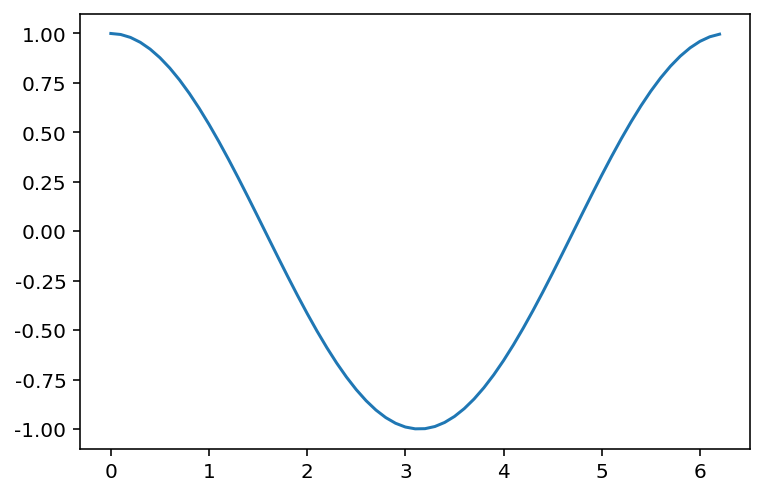

In [51]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
x = np.arange(0,2*np.pi,0.1)
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [53]:
bok_DTM.shape

(978, 1000)

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

sim_result = cosine_similarity(bok_DTM[:10], bok_DTM[:10])
print("#유사도 계산 행렬의 크기:", sim_result.shape)
sim_result

#유사도 계산 행렬의 크기: (10, 10)


array([[1.        , 0.91796632, 0.89999561, 0.85847712, 0.89694986,
        0.76660187, 0.96869619, 0.93663253, 0.86323484, 0.88474539],
       [0.91796632, 1.        , 0.88527007, 0.82770597, 0.88464763,
        0.72833659, 0.92589576, 0.96433097, 0.8837009 , 0.89831804],
       [0.89999561, 0.88527007, 1.        , 0.85238115, 0.84856369,
        0.68411291, 0.88222205, 0.90639645, 0.89040182, 0.86691648],
       [0.85847712, 0.82770597, 0.85238115, 1.        , 0.81520695,
        0.63767111, 0.85523855, 0.85524116, 0.81484262, 0.83952664],
       [0.89694986, 0.88464763, 0.84856369, 0.81520695, 1.        ,
        0.80293263, 0.90986857, 0.89464095, 0.84365446, 0.85223549],
       [0.76660187, 0.72833659, 0.68411291, 0.63767111, 0.80293263,
        1.        , 0.75866856, 0.73475037, 0.65064328, 0.70673436],
       [0.96869619, 0.92589576, 0.88222205, 0.85523855, 0.90986857,
        0.75866856, 1.        , 0.93966028, 0.87172459, 0.88667443],
       [0.93663253, 0.96433097, 0.9063964

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
bok_tfidf_vec = TfidfVectorizer(max_features=1000, tokenizer=mecab.tokens)

bok_tfidf_DTM = bok_tfidf_vec.fit_transform(df.text) #text를 이용하여 count vector를 학습하고, 변환
print(bok_tfidf_vec.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환
# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :', bok_tfidf_vec.vocabulary_)

['%' '%,' "'" '(' ')' ',' '-' '.' '0' '1' '10' '11' '12' '19' '2' '2012'
 '2013' '2014' '25' '3' '4' '5' '50' '6' '7' '75' '8' '9' 'dti' 'ecb'
 'gdp' 'imf' 'it' 'ltv' 'm' '·' '가' '가격' '가계' '가능' '가시' '가운데' '가장' '가지'
 '가치' '간' '갈' '감' '감독' '감소' '감소세' '감안' '강구' '강세' '강조' '강화' '같' '같이' '개발'
 '개별' '개선' '개월' '개인' '개진' '개혁' '갭' '거나' '거래' '거시' '거시경제' '건설' '건전' '검토'
 '것' '게' '겠' '격차' '겪' '견조' '견해' '결과' '결국' '결정' '결정시' '경계' '경기' '경로' '경상'
 '경색' '경우' '경쟁' '경쟁력' '경제' '경향' '경험' '계' '계속' '계층' '계획' '고']
vocabulary : {'일부': 716, '위원': 649, '은': 676, '관련': 115, '부서': 406, '에서': 583, '지난': 836, '3': 19, '4': 20, '분기': 416, '중': 819, '유로': 660, '지역': 842, '경제': 92, '성장': 476, '부진': 412, '을': 678, '자동차': 726, '규제': 135, '등': 285, '일시': 717, '적': 751, '요인': 631, '에': 581, '의한': 684, '것': 73, '으로': 671, '평가': 923, '한': 943, '과': 108, '하': 935, '여': 585, ',': 5, '동': 264, '만': 312, '는': 205, '률': 307, '둔화': 280, '설명': 472, '충분': 891, '지': 834, '않': 551, '아': 538, '보인다고': 394, '언급': 576, '였': 603, '음': 680, '

In [62]:
sim_result = cosine_similarity(bok_tfidf_DTM[:10], bok_tfidf_DTM[:10])
print("#유사도 계산 행렬의 크기:", sim_result.shape)
sim_result

#유사도 계산 행렬의 크기: (10, 10)


array([[1.        , 0.86853528, 0.83551949, 0.72555387, 0.85831978,
        0.65046326, 0.94509553, 0.88931907, 0.76752503, 0.79986666],
       [0.86853528, 1.        , 0.83944164, 0.70758457, 0.83102991,
        0.60174697, 0.87847802, 0.93253905, 0.80390478, 0.81652109],
       [0.83551949, 0.83944164, 1.        , 0.71277454, 0.79239696,
        0.55734058, 0.82010967, 0.8578371 , 0.81580784, 0.7769041 ],
       [0.72555387, 0.70758457, 0.71277454, 1.        , 0.68078789,
        0.46373226, 0.72040668, 0.72825212, 0.64784256, 0.67493588],
       [0.85831978, 0.83102991, 0.79239696, 0.68078789, 1.        ,
        0.70827729, 0.86848251, 0.83933712, 0.75488427, 0.76480622],
       [0.65046326, 0.60174697, 0.55734058, 0.46373226, 0.70827729,
        1.        , 0.64815043, 0.61384854, 0.5183577 , 0.56681497],
       [0.94509553, 0.87847802, 0.82010967, 0.72040668, 0.86848251,
        0.64815043, 1.        , 0.89575561, 0.77643111, 0.80129762],
       [0.88931907, 0.93253905, 0.8578371